Author: Fejiro Obor

# NLP With Hotel Reviews - Part 1

This deliverable aims to perform exploratory data anslysis and data pre-processing on a hotel reviews dataset provided by the BrainStation team.

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the hotel reviews dataset

reviews = pd.read_csv('Hotel_Reviews.csv')
reviews.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


## Exploratory Data Analysis

#### Q.1a checking the dimensions of the dataset.

In [3]:
reviews.shape

(515738, 17)

The Dataset contains 515,738 rows and 17 columns. The individual column names are listed below:

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

The non-numeric columns in the dataset include: 

In [5]:
categ_columns = reviews.select_dtypes('object').columns[:]
list(categ_columns)

['Hotel_Address',
 'Review_Date',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Positive_Review',
 'Tags',
 'days_since_review']

In [6]:
reviews[categ_columns].head(3)

,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"[' Leisure trip ', ' Family with young childre...",3 days


The numeric columns in the dataset include:

In [7]:
num_columns = reviews.select_dtypes('number').columns[:]
list(num_columns)

['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'lat',
 'lng']

In [8]:
reviews[num_columns].head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
0,194,7.7,397,1403,11,7,2.9,52.360576,4.915968
1,194,7.7,0,1403,105,7,7.5,52.360576,4.915968
2,194,7.7,42,1403,21,9,7.1,52.360576,4.915968
3,194,7.7,210,1403,26,1,3.8,52.360576,4.915968
4,194,7.7,140,1403,8,3,6.7,52.360576,4.915968


Next, I will check to see if there are any duplicate rows of data:

In [9]:
len(reviews[reviews.duplicated()])

526

In [10]:
reviews[reviews.duplicated()].head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
23704,100 110 Euston Road Camden London NW1 2AJ Unit...,728,2/25/2017,8.9,Pullman London St Pancras,China,none,2,3168,good location and super nice staff room is bi...,13,39,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",159 day,51.528677,-0.128349
61876,16 22 Great Russell Street Camden London WC1B ...,300,7/27/2017,9.0,The Bloomsbury Hotel,Israel,No Negative,0,1254,The attention received by Sebastian and his t...,12,4,9.6,"[' Leisure trip ', ' Couple ', ' Superior Doub...",7 days,51.517167,-0.129053
68967,167 rue de Rome 17th arr 75017 Paris France,11,6/23/2017,6.8,Villa Eugenie,Netherlands,Location is very old not invested in past yea...,41,165,Location is central accessible by train parki...,12,24,4.6,"[' Business trip ', ' Solo traveler ', ' Singl...",41 days,48.887128,2.314205


There appears to be 526 duplicate rows within this dataset. I can drill into an example to see what these duplicates might look like before dropping them:

In [11]:
reviews[(reviews["Hotel_Name"] == 'Pullman London St Pancras') & (reviews["Average_Score"] == 8.9) & (reviews["Review_Date"] == '2/25/2017')]

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
23703,100 110 Euston Road Camden London NW1 2AJ Unit...,728,2/25/2017,8.9,Pullman London St Pancras,China,none,2,3168,good location and super nice staff room is bi...,13,39,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",159 day,51.528677,-0.128349
23704,100 110 Euston Road Camden London NW1 2AJ Unit...,728,2/25/2017,8.9,Pullman London St Pancras,China,none,2,3168,good location and super nice staff room is bi...,13,39,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",159 day,51.528677,-0.128349


These duplicate rows are not needed for our analysis so I will exclude them from the dataset moving forward:

In [12]:
# dropping duplicate rows
reviews = reviews.drop(reviews[reviews.duplicated()].index, axis = 0)
len(reviews)

515212

We are left with 515,212 rows of data. Next, I will look at the columns that have null values: 

In [13]:
reviews.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

The latitude and longitude columns have 3,268 rows of null data. I do not think these columns are mandatory for our dataset since there are other columns which contain information about the geographical location of the hotels and the reviewers. Therefore, I will exclude these columns from the analysis moving forward.

In [14]:
reviews.drop(['lat','lng'], axis=1, inplace = True)

#### Q. 1b Convert Reviews from decimal to integer values

In [15]:
reviews["Reviewer_Score"].head()

0    2.9
1    7.5
2    7.1
3    3.8
4    6.7
Name: Reviewer_Score, dtype: float64

Taking a look at the 'Reviewer_Score' column above, we can see that the customer reviews were provided as decimal values. Those values will be converted to integer values for easier processing:

In [16]:
reviews["Reviewer_Score"] = (reviews["Reviewer_Score"]).apply(lambda x: round(x))
reviews["Reviewer_Score"].head()

0    3
1    8
2    7
3    4
4    7
Name: Reviewer_Score, dtype: int64

In [17]:
round(reviews["Reviewer_Score"].mean(),1)

8.5

The 'Reviewer_Score' column has been converted to integer values. The mean value of all reviewer scores is 8.5 which is quite high. We can take a further look at how the numeric columns are distributed below:

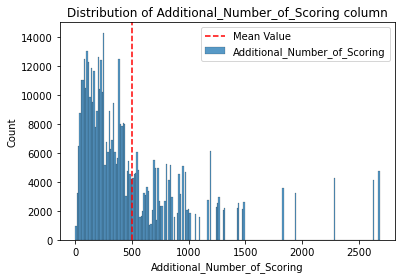

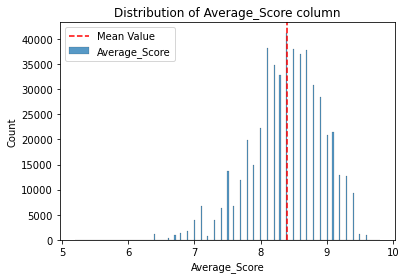

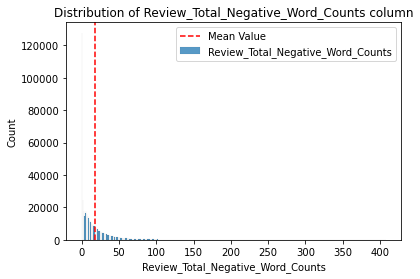

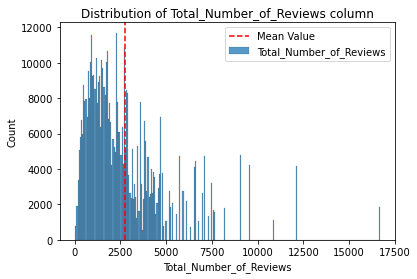

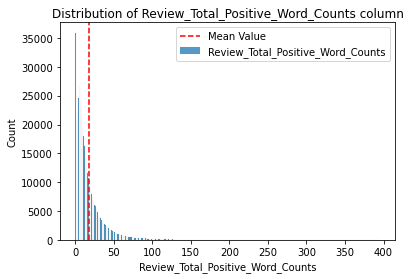

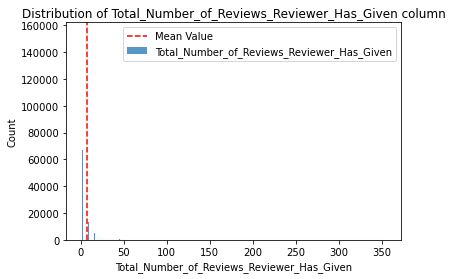

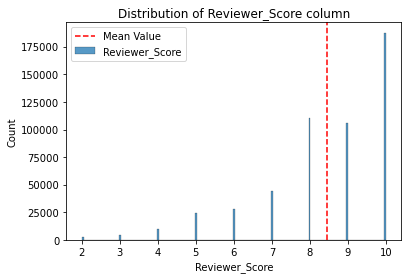

In [18]:
num_columns = reviews.select_dtypes('number').columns[:]

for col in num_columns:
#     plt.figure(figsize=(16, 8))
    sns.histplot(x = reviews[col])
    plt.axvline(reviews[col].mean(), color = "red", linestyle = '--')
    plt.title('Distribution of '+ col + ' column')
    plt.ylabel('Count')
    plt.legend(labels = ['Mean Value', col])
    plt.show()

#### Q. 1c - Distribution of Reviewer_Score

As seen in the histogram above, the data in the numeric columns are not normally distributed.

More specifically, the distribution of the Reviewer_Score column is heavily skewed to the right. The dataset contains more positive/highly rated reviews as compared to negative/poor reviews. Given that the average Reviewer_Score was 8.5 which is quite high, this rightly skewed distribution was expected.

#### Q. 1d Potential Problem

Given that this will be a classification problem, there could be a potential problem with fact that the distribution of the Reviewer_Score column and other columns is not Normal. Sigmoid functions for the Logistic Regression model, and other ML models operate on the assumption of normally distributed data so this may pose some issues later on.

#### Q. 2 Selecting/Converting Columns

The dataset can be pruned further by extracting some useful information out of the existing columns. For example, some of the non-numeric columns can be converted to numeric columns.

Looking at the summary description of the categorical columns below, we can see each column has a lot of unique values. We cannot simply encode each column because that would result in high dimensionality. Some alternative possible column manuipulations to perform before encoding include:
- Extracting the number of days from the 'days_since_review' column
- Extracting the country where the hotel is located from the 'Hotel Address' column
- Extracting 'Reviewer Nationality'
- Extracting key words from the 'Tags' column

In [19]:
reviews.describe(include = "object")

,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
count,515212,515212,515212,515212,515212,515212,515212,515212
unique,1493,731,1492,227,330011,412601,55242,731
top,163 Marsh Wall Docklands Tower Hamlets London ...,8/2/2017,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days
freq,4789,2584,4789,245110,127757,35904,5101,2584


In [20]:
reviews[categ_columns].head(3)

,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"[' Leisure trip ', ' Family with young childre...",3 days


## Data Wrangling

#### Q. 3a Convert the Reviewer_Score column into a binary column

To easily classify the reviews as either good or bad, we can create a new binary column called 'Sentiment'. The review sentiment will be classified as 'good' if Reviewer_Score is greater than or equal to 9, and 'bad' otherwise.

In [21]:
reviews['Sentiment'] = np.where(reviews['Reviewer_Score'] >= 9, 1, 0)
reviews.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Sentiment
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,3,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,8,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",3 days,0


We can also look at the breakdown of 'good' vs 'bad' reviews within this dataset as shown below:

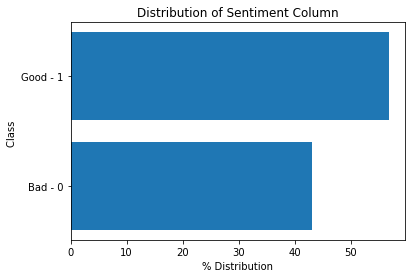

The dataset contains 43.0 % of negative reviews &  57.0 % of positive reviews


In [22]:
values, counts = np.unique(reviews['Sentiment'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.barh(["Bad - 0", "Good - 1"], normalized_counts*100)
plt.xlabel('% Distribution')
plt.ylabel('Class ')
plt.title('Distribution of Sentiment Column')
plt.show()

print("The dataset contains", round(normalized_counts[0]*100,0), "% of negative reviews & ", round(normalized_counts[1]*100,0), "% of positive reviews")

This dataset contains 43% of reviews with reviewer_score below 9, while 57% scored above that. Although, the dataset does not contain an equal amount of 'good' and 'bad' reviews, the class imbalance is not large.

To reduce the computation power required to process the entire dataset, I will continue testing with only 10% of the dataset moving forward:

In [23]:
# Using the train_test_split function to sample 10% of the the data
from sklearn.model_selection import train_test_split

# Separating the features (X) and the target variable (y)
X = reviews.drop(['Sentiment'], axis=1)
y = reviews['Sentiment']


# Performing stratified sampling
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, random_state=42, stratify=y)

# Combining the sampled features and target variable into a new DataFrame
sampled_reviews = pd.concat([X_sample, y_sample], axis=1)
sampled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51521 entries, 65550 to 336084
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               51521 non-null  object 
 1   Additional_Number_of_Scoring                51521 non-null  int64  
 2   Review_Date                                 51521 non-null  object 
 3   Average_Score                               51521 non-null  float64
 4   Hotel_Name                                  51521 non-null  object 
 5   Reviewer_Nationality                        51521 non-null  object 
 6   Negative_Review                             51521 non-null  object 
 7   Review_Total_Negative_Word_Counts           51521 non-null  int64  
 8   Total_Number_of_Reviews                     51521 non-null  int64  
 9   Positive_Review                             51521 non-null  object 
 10  Revie

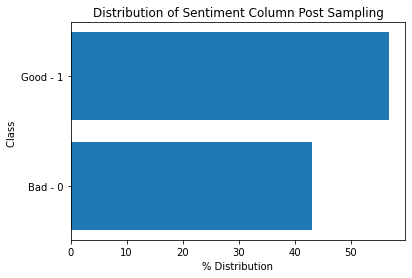

The dataset stil contains 43.0 % of negative reviews &  57.0 % of positive reviews after sampling.


In [24]:
values, counts = np.unique(sampled_reviews['Sentiment'], return_counts=True)
normalized_counts = counts/counts.sum()

# plot normalized distribution after sampling
plt.barh(["Bad - 0", "Good - 1"], normalized_counts*100)
plt.xlabel('% Distribution')
plt.ylabel('Class ')
plt.title('Distribution of Sentiment Column Post Sampling')
plt.show()

print("The dataset stil contains", round(normalized_counts[0]*100,0), "% of negative reviews & ", round(normalized_counts[1]*100,0), "% of positive reviews after sampling.")

#### Q 3b. Convert non-numeric columns to numeric columns

##### The 'days_since_review' Column

- First, I will extract the number of days from the days_since_review column:

In [25]:
sampled_reviews.reset_index(inplace = True)

In [26]:
sampled_reviews.head(3)

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Sentiment
0,65550,163 Marsh Wall Docklands Tower Hamlets London ...,2682,12/20/2015,7.1,Britannia International Hotel Canary Wharf,United Kingdom,Horrible decor and rooms showing their age pe...,28,9086,Good location for Canary Wharf Good price for...,13,4,5,"[' Leisure trip ', ' Solo traveler ', ' Standa...",592 day,0
1,138681,30 Barkston Gardens Kensington and Chelsea Lon...,137,8/18/2015,8.6,Henley House Hotel,United States of America,Only one electrical outlet two plugs per room...,17,1179,Very friendly and helpful service Great locat...,12,1,10,"[' Leisure trip ', ' Group ', ' Deluxe Twin Ro...",716 day,1
2,407854,Piazza Giuseppe Missori 1 Milan City Center 20...,301,7/14/2016,8.4,Hotel Dei Cavalieri,United Kingdom,Breakfast buffet was not very good quality ro...,14,3445,The hotel was easy to find by car and a great...,21,1,8,"[' Leisure trip ', ' Family with older childre...",385 day,0


In [27]:
# The days_since_review column can be convereted to an integer as shown below:

sampled_reviews['days_since_review'] = (sampled_reviews["days_since_review"]).apply(lambda x: int(x.split(' ')[0]))

In [28]:
sampled_reviews.head(3)

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Sentiment
0,65550,163 Marsh Wall Docklands Tower Hamlets London ...,2682,12/20/2015,7.1,Britannia International Hotel Canary Wharf,United Kingdom,Horrible decor and rooms showing their age pe...,28,9086,Good location for Canary Wharf Good price for...,13,4,5,"[' Leisure trip ', ' Solo traveler ', ' Standa...",592,0
1,138681,30 Barkston Gardens Kensington and Chelsea Lon...,137,8/18/2015,8.6,Henley House Hotel,United States of America,Only one electrical outlet two plugs per room...,17,1179,Very friendly and helpful service Great locat...,12,1,10,"[' Leisure trip ', ' Group ', ' Deluxe Twin Ro...",716,1
2,407854,Piazza Giuseppe Missori 1 Milan City Center 20...,301,7/14/2016,8.4,Hotel Dei Cavalieri,United Kingdom,Breakfast buffet was not very good quality ro...,14,3445,The hotel was easy to find by car and a great...,21,1,8,"[' Leisure trip ', ' Family with older childre...",385,0


In [29]:
sampled_reviews['days_since_review'].describe()

count    51521.000000
mean       354.677821
std        209.095474
min          0.000000
25%        175.000000
50%        352.000000
75%        528.000000
max        730.000000
Name: days_since_review, dtype: float64

##### The 'Hotel_Address' Column

- Next, We can also extract the location of the hotels from the 'Hotel_Address' column as shown below:

In [30]:
locations = []
for i in range (0, len(sampled_reviews)):
    strings = sampled_reviews['Hotel_Address'][i].split(' ')
    locations.append(strings[-1])

sampled_reviews['Country'] = pd.DataFrame(locations)
sampled_reviews['Country'].unique()

array(['Kingdom', 'Italy', 'Austria', 'Spain', 'France', 'Netherlands'],
      dtype=object)

We can see from above that the hotels in our dataset are located in only 6 unique countries including: UK, Italy, Austria, Spain, France and Netherlands. We can create dummy varaibles from these countries as shown below:

In [31]:
# Create dummy variables from the Country column and drop one dummmy variable

dummy_df = pd.get_dummies(sampled_reviews['Country'])


new_columns=[]

for i in range(0, len(dummy_df.columns)):
    new_columns.append('Hotel_In_' + dummy_df.columns[i])

dummy_df.columns = new_columns
dummy_df.head()

# Combine the original DataFrame with the dummy variables

sampled_reviews = pd.concat((sampled_reviews, dummy_df), axis=1)

sampled_reviews.head(2)

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,Tags,days_since_review,Sentiment,Country,Hotel_In_Austria,Hotel_In_France,Hotel_In_Italy,Hotel_In_Kingdom,Hotel_In_Netherlands,Hotel_In_Spain
0,65550,163 Marsh Wall Docklands Tower Hamlets London ...,2682,12/20/2015,7.1,Britannia International Hotel Canary Wharf,United Kingdom,Horrible decor and rooms showing their age pe...,28,9086,...,"[' Leisure trip ', ' Solo traveler ', ' Standa...",592,0,Kingdom,0,0,0,1,0,0
1,138681,30 Barkston Gardens Kensington and Chelsea Lon...,137,8/18/2015,8.6,Henley House Hotel,United States of America,Only one electrical outlet two plugs per room...,17,1179,...,"[' Leisure trip ', ' Group ', ' Deluxe Twin Ro...",716,1,Kingdom,0,0,0,1,0,0


In [32]:
# To avoid multicolinearity between the dummy variables created above, we will drop one of the countries

sampled_reviews.drop(['Country', 'Hotel_In_Austria'], axis = 1, inplace = True)

sampled_reviews.head(2)

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Sentiment,Hotel_In_France,Hotel_In_Italy,Hotel_In_Kingdom,Hotel_In_Netherlands,Hotel_In_Spain
0,65550,163 Marsh Wall Docklands Tower Hamlets London ...,2682,12/20/2015,7.1,Britannia International Hotel Canary Wharf,United Kingdom,Horrible decor and rooms showing their age pe...,28,9086,...,4,5,"[' Leisure trip ', ' Solo traveler ', ' Standa...",592,0,0,0,1,0,0
1,138681,30 Barkston Gardens Kensington and Chelsea Lon...,137,8/18/2015,8.6,Henley House Hotel,United States of America,Only one electrical outlet two plugs per room...,17,1179,...,1,10,"[' Leisure trip ', ' Group ', ' Deluxe Twin Ro...",716,1,0,0,1,0,0


##### The 'Reviewer_Nationality' Column

- Next, we can extract some useful information from the Reviewer_Nationality column.

In [33]:
values, counts = np.unique(sampled_reviews['Reviewer_Nationality'], return_counts=True)

df = pd.DataFrame(data = values, columns = ['Reviewer_Country'])
df['Counts'] = counts
df['Percent of Dataset'] = round(df['Counts']/(df['Counts'].sum())*100,0)
df.sort_values('Counts', ascending=False).head(10)

,Reviewer_Country,Counts,Percent of Dataset
161,United Kingdom,24542,48.0
163,United States of America,3540,7.0
11,Australia,2172,4.0
72,Ireland,1461,3.0
160,United Arab Emirates,1038,2.0
111,Netherlands,901,2.0
148,Switzerland,868,2.0
130,Saudi Arabia,849,2.0
56,Germany,790,2.0
32,Canada,762,1.0


As seen from above, majority of the reviewers are from UK, USA and Australia. For all Reviewer_Country with less than 2% occurence within the data, they will be classified as 'Other'. We can then create dummy variables from these columns:

In [34]:
keep_countries = [' United Kingdom ', ' United States of America ', ' Australia ', ' Ireland ', ' United Arab Emirates ',
                  ' Netherlands ', ' Switzerland ', ' Saudi Arabia ', ' Germany ']

In [35]:
sampled_reviews['Reviewer_Nationality'][0] in keep_countries

True

In [36]:
# Replace Reviewer_Nationality with 'Other' if they are not one of the previously identified top countries

for i in range(0, len(sampled_reviews)):
    if sampled_reviews['Reviewer_Nationality'][i] in keep_countries:
        pass
    else:
        sampled_reviews['Reviewer_Nationality'][i] = 'Other'

sampled_reviews['Reviewer_Nationality'].unique()

array([' United Kingdom ', ' United States of America ', 'Other',
       ' Saudi Arabia ', ' Ireland ', ' United Arab Emirates ',
       ' Germany ', ' Australia ', ' Switzerland ', ' Netherlands '],
      dtype=object)

In [37]:
#  creating dummy variables from the Reviewer_Nationality column

dummy_df = pd.get_dummies(sampled_reviews['Reviewer_Nationality'])

new_columns=[]

for i in range(0, len(dummy_df.columns)):
    new_columns.append('Reviewer_from_' + dummy_df.columns[i])

dummy_df.columns = new_columns
dummy_df.head()

,Reviewer_from_ Australia,Reviewer_from_ Germany,Reviewer_from_ Ireland,Reviewer_from_ Netherlands,Reviewer_from_ Saudi Arabia,Reviewer_from_ Switzerland,Reviewer_from_ United Arab Emirates,Reviewer_from_ United Kingdom,Reviewer_from_ United States of America,Reviewer_from_Other
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [38]:
# Combine the original DataFrame with the dummy variables

sampled_reviews = pd.concat((sampled_reviews, dummy_df), axis=1)

# To avoid multicolinearity between the dummy variables created above, we will drop one of the countries

sampled_reviews.drop(['Reviewer_Nationality', 'Reviewer_from_Other'], axis = 1, inplace = True)

sampled_reviews.head(2)

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Hotel_In_Spain,Reviewer_from_ Australia,Reviewer_from_ Germany,Reviewer_from_ Ireland,Reviewer_from_ Netherlands,Reviewer_from_ Saudi Arabia,Reviewer_from_ Switzerland,Reviewer_from_ United Arab Emirates,Reviewer_from_ United Kingdom,Reviewer_from_ United States of America
0,65550,163 Marsh Wall Docklands Tower Hamlets London ...,2682,12/20/2015,7.1,Britannia International Hotel Canary Wharf,Horrible decor and rooms showing their age pe...,28,9086,Good location for Canary Wharf Good price for...,...,0,0,0,0,0,0,0,0,1,0
1,138681,30 Barkston Gardens Kensington and Chelsea Lon...,137,8/18/2015,8.6,Henley House Hotel,Only one electrical outlet two plugs per room...,17,1179,Very friendly and helpful service Great locat...,...,0,0,0,0,0,0,0,0,0,1


##### The 'Tags' Column

Lastly, I will explore the 'Tags' column to see if there is a way to extract some useful numeric information:

In [39]:
# Looking at the tags in the first row excluding the special characters except ','

import re

string = sampled_reviews['Tags'][0]
cleaned_string = re.sub(r"[^\w\s']", "", string)
cleaned_string

"' Leisure trip ' ' Solo traveler ' ' Standard Single Room ' ' Stayed 1 night '"

The different tags in the 'Tags' column seem to explain different aspects of the reviewer's trip including:

- Trip type
- Amount of travellers
- Room type
- Trip duration
- and more

I will try to drill more into the total number of unique tags to see if it is possible to group them into smaller categories before encoding.

In [40]:
import ast

# Creating an empty dictionary to store the tag counts of each unique tag

tag_counts = {}

# Iterating over the 'Tags' column and count the occurrences of each tag

for tags in sampled_reviews['Tags']:
    tags_list = ast.literal_eval(tags)  # Convert the string representation to a list
    for tag in tags_list:
        if tag in tag_counts:
            tag_counts[tag] += 1
        else:
            tag_counts[tag] = 1

# Creating a DataFrame from the tag counts dictionary and sorting by counts in descending order

df_tag_counts = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])
df_tag_counts = df_tag_counts.sort_values('Count', ascending=False)
df_tag_counts = df_tag_counts.reset_index(drop=True)

In [41]:
len(df_tag_counts)

1650

There are 1,650 unique tags in the 'Tags' column. The top 20 most occuring 'Tags' are:

In [42]:
df_tag_counts.head(20)

,Tag,Count
0,Leisure trip,41609
1,Submitted from a mobile device,30577
2,Couple,25176
3,Stayed 1 night,19445
4,Stayed 2 nights,13249
5,Solo traveler,10861
6,Stayed 3 nights,9565
7,Business trip,8424
8,Group,6564
9,Family with young children,6101


In [43]:
df_tag_counts[df_tag_counts['Tag'].str.contains('stay', case=False)].head(20)

,Tag,Count
3,Stayed 1 night,19445
4,Stayed 2 nights,13249
6,Stayed 3 nights,9565
10,Stayed 4 nights,4766
17,Stayed 5 nights,2100
22,Stayed 6 nights,1002
26,Stayed 7 nights,737
52,Stayed 8 nights,267
74,Stayed 9 nights,128
99,Stayed 10 nights,83


Trying to encode the 'Tags' column will introduce the issue of high dimensionality to the model. Although it is possible to further prune this column to obtain a smaller number of relevant tags, instead I will drop this column from my analysis moving forward.

In [44]:
# Dropping the non-numeric columns except Positive/Negative reviews & the columns created above

sampled_reviews.drop(['index', 'Hotel_Address', 'Review_Date', 'Hotel_Name', 'Tags'], axis = 1, inplace = True)

sampled_reviews.head(3)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,...,Hotel_In_Spain,Reviewer_from_ Australia,Reviewer_from_ Germany,Reviewer_from_ Ireland,Reviewer_from_ Netherlands,Reviewer_from_ Saudi Arabia,Reviewer_from_ Switzerland,Reviewer_from_ United Arab Emirates,Reviewer_from_ United Kingdom,Reviewer_from_ United States of America
0,2682,7.1,Horrible decor and rooms showing their age pe...,28,9086,Good location for Canary Wharf Good price for...,13,4,5,592,...,0,0,0,0,0,0,0,0,1,0
1,137,8.6,Only one electrical outlet two plugs per room...,17,1179,Very friendly and helpful service Great locat...,12,1,10,716,...,0,0,0,0,0,0,0,0,0,1
2,301,8.4,Breakfast buffet was not very good quality ro...,14,3445,The hotel was easy to find by car and a great...,21,1,8,385,...,0,0,0,0,0,0,0,0,1,0


In [45]:
sampled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51521 entries, 0 to 51520
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Additional_Number_of_Scoring                51521 non-null  int64  
 1   Average_Score                               51521 non-null  float64
 2   Negative_Review                             51521 non-null  object 
 3   Review_Total_Negative_Word_Counts           51521 non-null  int64  
 4   Total_Number_of_Reviews                     51521 non-null  int64  
 5   Positive_Review                             51521 non-null  object 
 6   Review_Total_Positive_Word_Counts           51521 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  51521 non-null  int64  
 8   Reviewer_Score                              51521 non-null  int64  
 9   days_since_review                           51521 non-null  int64  
 10  Sentiment 

#### Q. 3c Splitting the data into test & train sets

In [46]:
# Separate the features (X) and the target variable (y)

X = sampled_reviews.drop(['Sentiment'], axis=1)
y = sampled_reviews['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [47]:
X_train.shape

(36064, 24)

In [48]:
X_test.shape

(15457, 24)

#### Q. 3d Use a count vectorizer to combine 'Positive_Review' and 'Negative_Review' columns with the numeric data

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

First, I will fit bag of words while removing the English stop words from both of the Review columns :

In [50]:
# 1. Instantiate 
neg_bagofwords = CountVectorizer(stop_words="english")

# 2. Fit 
neg_bagofwords.fit(X_train["Negative_Review"])

# 3. Transform
neg_reviews_transformed = neg_bagofwords.transform(X_train["Negative_Review"])
neg_reviews_transformed

<36064x14871 sparse matrix of type '<class 'numpy.int64'>'
	with 273139 stored elements in Compressed Sparse Row format>

We can see from the result of the fit above that the sparse matrix has 36,064 rows and 14,871 columns. In other words, there are 14,871  unique terms or tokens returned from the Negative_Review column after the English stop words were removed.

In [51]:
# 1. Instantiate 
pos_bagofwords = CountVectorizer(stop_words="english")

# 2. Fit 
pos_bagofwords.fit(X_train["Positive_Review"])

# 3. Transform
pos_reviews_transformed = pos_bagofwords.transform(X_train["Positive_Review"])
pos_reviews_transformed

<36064x12859 sparse matrix of type '<class 'numpy.int64'>'
	with 309557 stored elements in Compressed Sparse Row format>

Repeating the same exercise on the Positive_Review column, we can see that there are 12,859 unique terms or tokens returned from the Negative_Review column after the English stop words were removed.

We can prune the dataset further by specifying the min_df parameter. 

#### Q. 3e What does the 'min_df' parameter do?

'min_df' is a parameter we can specify in the CountVectorizer function to remove terms that appear too infrequently within the dataset. This is a nice feature to have for pruning the number of unique tokens returned.The parameter can be specified in two ways:
- min_df = 0.01 where tokens that appear in less than 1% of the documents are ignored.
- min_df = 5 where tokens that appear in less than 5 documents are ignored.

Next, I will explore how the number of unique tokens returned varies with min_df below:

In [52]:
number_unique_tokens = []

for i in np.arange(0.,0.1,0.01):
    # 1. Instantiate
    neg_bagofwords = CountVectorizer(stop_words = "english", min_df = i)
    # 2. Fit
    neg_bagofwords.fit(X_train["Negative_Review"])
    # 3. Transform
    neg_reviews_transformed = neg_bagofwords.transform(X_train["Negative_Review"])
    neg_reviews_transformed
    number_unique_tokens.append(neg_reviews_transformed.shape[1])

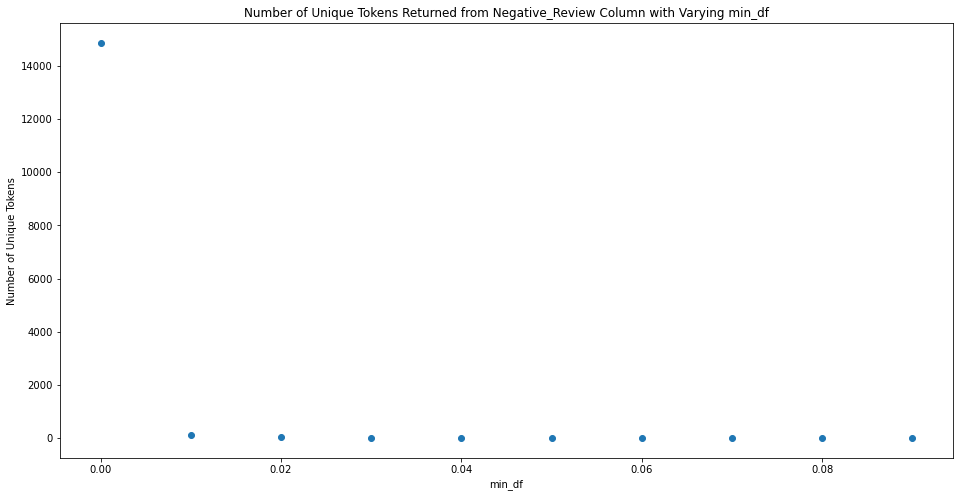

In [53]:
# plot the change in the number of unique tokens returned from the Negative_Review column based on varying min_df parameter

plt.figure(figsize=(16, 8))
plt.scatter(x = np.arange(0.,0.1,0.01), y = number_unique_tokens)
plt.xlabel('min_df')
plt.ylabel('Number of Unique Tokens')
plt.title('Number of Unique Tokens Returned from Negative_Review Column with Varying min_df')
plt.show()

In [54]:
number_unique_tokens

[14871, 124, 44, 23, 13, 9, 6, 5, 5, 4]

As seen above, by specifying min_df = 0.01, the total number of unique tokens in the Negative_Review column reduced drastically from 14,871 to 124. To keep only 23 unique tokens from the Negative_Review column, I will proceed with excluding terms that appear in less than 3% of the Negative reviews (min_df = 0.03)

In [55]:
# 1. Instantiate 
neg_bagofwords = CountVectorizer(stop_words="english", min_df=0.03)

# 2. Fit 
neg_bagofwords.fit(X_train["Negative_Review"])

# 3. Transform
neg_reviews_transformed = neg_bagofwords.transform(X_train["Negative_Review"])
neg_reviews_transformed

<36064x23 sparse matrix of type '<class 'numpy.int64'>'
	with 54865 stored elements in Compressed Sparse Row format>

Next, I will look at the top 20 most occuring tokens in the Negative_Review column:

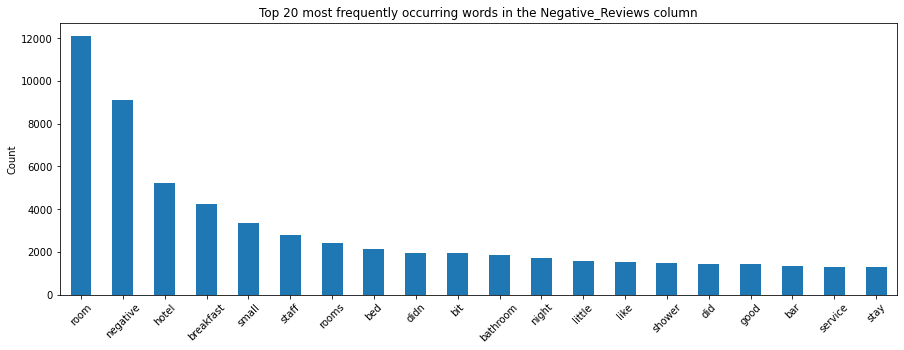

In [56]:
negative_words = pd.DataFrame(
    {"counts": neg_reviews_transformed.toarray().sum(axis=0)},
    index=neg_bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

negative_words.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words in the Negative_Reviews column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Repeating the same exercise on the Positive_Review column:

In [57]:
number_unique_tokens = []

for i in np.arange(0.,0.1,0.01):
    # 1. Instantiate
    pos_bagofwords = CountVectorizer(stop_words = "english", min_df = i)
    # 2. Fit
    pos_bagofwords.fit(X_train["Positive_Review"])
    # 3. Transform
    pos_reviews_transformed = pos_bagofwords.transform(X_train["Positive_Review"])
    pos_reviews_transformed
    number_unique_tokens.append(pos_reviews_transformed.shape[1])

number_unique_tokens

[12859, 117, 60, 33, 25, 20, 17, 16, 14, 14]

Proceeding with min_df = 0.04 for the Positive_Review column, we can see the top 20 most frequently occuring tokens:

In [58]:
# 1. Instantiate 
pos_bagofwords = CountVectorizer(stop_words="english", min_df=0.04)

# 2. Fit 
pos_bagofwords.fit(X_train["Positive_Review"])

# 3. Transform
pos_reviews_transformed = pos_bagofwords.transform(X_train["Positive_Review"])
pos_reviews_transformed

<36064x25 sparse matrix of type '<class 'numpy.int64'>'
	with 113503 stored elements in Compressed Sparse Row format>

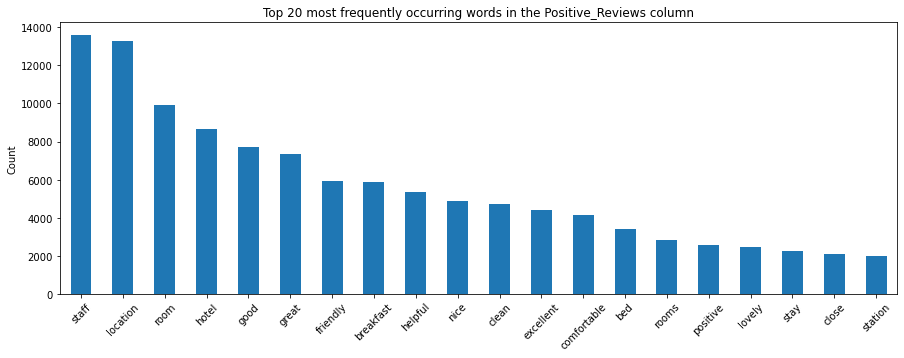

In [59]:
positive_words = pd.DataFrame(
    {"counts": pos_reviews_transformed.toarray().sum(axis=0)},
    index=pos_bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

positive_words.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words in the Positive_Reviews column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Combining the three matrixes

In [60]:
from scipy import sparse
from scipy.sparse import csr_matrix, hstack

In [61]:
# Dropping the 'Negative_Review' & 'Positive_Review' columns from the train Data

train_data = pd.concat([X_train, y_train], axis=1)
train_data.drop(['Negative_Review', 'Positive_Review'], axis = 1, inplace = True)

# Converting the numeric data into a sparse matrix
sparse_train_data = sparse.csr_matrix(train_data)
sparse_train_data

<36064x23 sparse matrix of type '<class 'numpy.float64'>'
	with 356057 stored elements in Compressed Sparse Row format>

In [62]:
# Horizontally stacking the three matrices
combined_train_data = sparse.hstack((pos_reviews_transformed, neg_reviews_transformed, sparse_train_data))  
combined_train_data

<36064x71 sparse matrix of type '<class 'numpy.float64'>'
	with 524425 stored elements in COOrdinate format>